In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset into a Pandas DataFrame

In [241]:
import pandas as pd
import numpy as np
df = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
original_df = df

## Data Preprocessing

The dataset 'crimedata.csv' was initially loaded into a Pandas DataFrame, and several columns were renamed using appropriate naming conventions for better readability. During the data cleaning process, occurrences of the '?' character in multiple columns were replaced with 0. Additionally, validation checks were performed to confirm that no '?' values remained after cleaning.

In [242]:
df=df.rename(columns = {'Êcommunityname':'Community Name'})
df = df.replace('?', 0)
df.head()

,crimeOccurence,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,1,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,1,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,...,225,1301.78,716,4142.56,47,271.93,0,0,306.64,0
4,1,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,...,91,728.93,1060,8490.87,91,728.93,5,40.05,0,9988.79


In [243]:
df.loc[df['countyCode'] == '?']
df.loc[df['ViolentCrimesPerPop'] == '?']

,crimeOccurence,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


## Creating Labels Based on Criteria

After thoroughly analyzing the dataset, we identified that predicting crime occurrence could be a valuable use case. To achieve this, we introduced a new label, 'violent_crime_occurrence', derived from the Violent Crimes Per Population column. The mean value of this column was calculated, and each entry was classified as 'yes' (1) if its value exceeded the mean, indicating a crime occurrence, or 'no' (0) if it was below the mean. This process resulted in the creation of a binary variable for crime prediction.

In [244]:
violent_crimes = list(map(float, df.ViolentCrimesPerPop))
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)
violent_crimes_mean

530.3040045146728

In [245]:
df['mean_violent_crimes'] = violent_crimes_mean
df['violent_crime_occurence'] = (df['ViolentCrimesPerPop'].astype(float) >= violent_crimes_mean).astype(float)
df.groupby('violent_crime_occurence').mean(numeric_only=True)


,crimeOccurence,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0.0,0.847213,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
1.0,0.829396,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


## Data Segmentation

To facilitate the application of clustering and classification algorithms, the dataset was segmented for better visualization. A temporary DataFrame was created containing a specific portion of the original data to support this process effectively.

In [246]:
df1 = df.iloc[:200]
df1.head()
df1.tail()

,crimeOccurence,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_violent_crimes,violent_crime_occurence
195,1,LongBeachcity,CA,0,0,1,429433,2.70,13.68,58.38,...,14108,3235.53,7626,1748.95,243,55.73,1631.98,6595.13,530.304005,1.0
196,1,Duluthcity,MN,137,17000,1,85493,2.47,0.87,95.89,...,3266,3852.28,268,316.11,14,16.51,0,5198.1,530.304005,0.0
197,1,Shelbycity,NC,0,0,1,14669,2.41,42.50,57.03,...,937,5831.83,41,255.18,7,43.57,1419.06,8956.25,530.304005,1.0
198,1,Coronacity,CA,0,0,1,76095,3.18,2.76,75.88,...,3099,3319.23,1334,1428.8,23,24.63,519.47,6434.96,530.304005,0.0
199,1,Beverlycity,MA,9,5595,1,38195,2.58,0.86,97.63,...,589,1511.57,106,272.03,4,10.27,87.26,3174.56,530.304005,0.0


## Feature Selection for Clustering Algorithms

In [247]:
features = ['householdsize', 'racepctblack']
X = df1[features].values
y = df1['violent_crime_occurence'].astype(float).values

## Plotting the actual data for visualisation

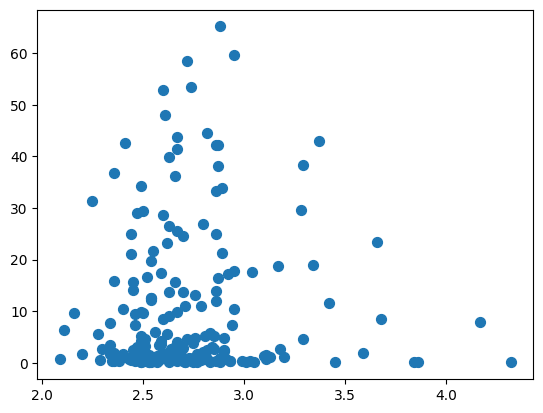

In [248]:
plt.scatter(X[:, 0], X[:, 1], s=50);

## Splitting the data

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Determining the Optimal Number of Clusters with the Elbow Method

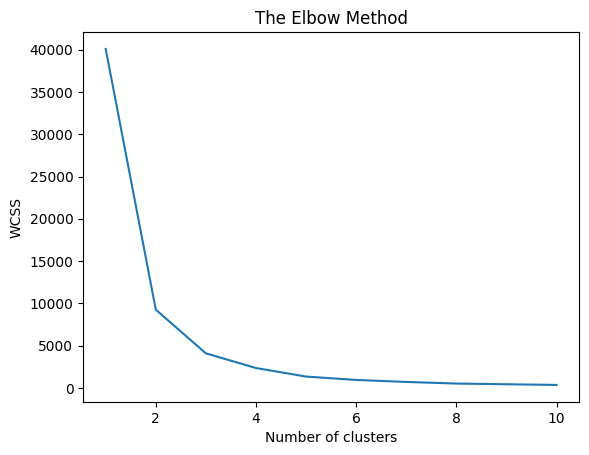

In [250]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K-Means Algorithm

In [251]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

## Visualising Clusters

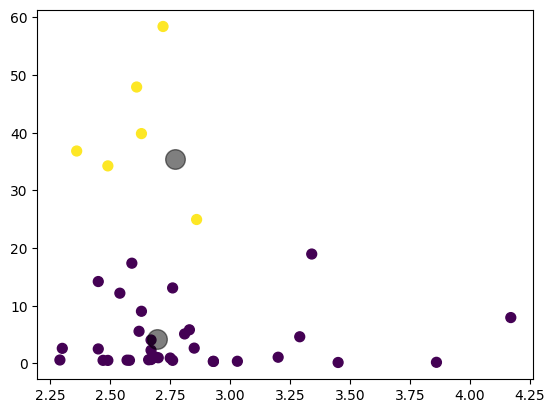

In [252]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Metrics Calculation

In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

kmeans_accuracy = accuracy_score(y_test, y_pred)
kmeans_precison=precision_score(y_test,y_pred,average=None)
kmeans_recall=recall_score(y_test,y_pred,average=None)
kmeans_f1=f1_score(y_test,y_pred,average=None)
kmeans_confusion_matrix = confusion_matrix(y_test, y_pred)

In [254]:
print("K-Means Clustering Performance")
print("-" * 30)
print("Evaluation Metrics:")
print(f"Accuracy: {kmeans_accuracy:.4f}")
print(f"Precision: {kmeans_precison.tolist()}")  # Convert array to list
print(f"Recall: {kmeans_recall.tolist()}")
print(f"F1 Score: {kmeans_f1.tolist()}")

print("\nConfusion Matrix:")
print(kmeans_confusion_matrix)


K-Means Clustering Performance
------------------------------
Evaluation Metrics:
Accuracy: 0.7250
Precision: [0.7058823529411765, 0.8333333333333334]
Recall: [0.96, 0.3333333333333333]
F1 Score: [0.8135593220338984, 0.47619047619047616]

Confusion Matrix:
[[24  1]
 [10  5]]


## Applying GMM 


### Data Preprocessing

In [255]:
import re
# Converting huge ranges of data to average values
def extractSubstring(myStr):
    myStr = str(myStr)  # Ensure input is a string

    if "-" in myStr:
        lowVal, hiVal = myStr.split("-")  

        # Remove non-numeric characters
        lowVal = re.sub(r'[^\d.]', '', lowVal)
        hiVal = re.sub(r'[^\d.]', '', hiVal)

        # Convert to float
        lowV = float(lowVal)
        hiV = float(hiVal)
        
        # Compute average
        average = (lowV + hiV) / 2
    else:
        average = convert_to_float(myStr)

    return average

def convert_to_float(input_str):
    input_str = str(input_str)  # Ensure input is a string
    return float(input_str.replace(",", ""))

# Apply the function to the DataFrame
df['PolicReqPerOffic'] = df['PolicReqPerOffic'].apply(extractSubstring)
df['ViolentCrimesPerPop'] = df['ViolentCrimesPerPop'].apply(extractSubstring)



### Feature selection 

In [256]:
Features = ['PolicReqPerOffic','ViolentCrimesPerPop']
X = df[Features].values

## Implementing GMM for Clustering

The goal is to cluster the dataset based on Violent Crimes Per Population and determine the necessary number of police required to manage and control crime occurrences effectively.

In [257]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

### Visualising the clusters

Text(0.5, 1.0, 'GMM Clustering')

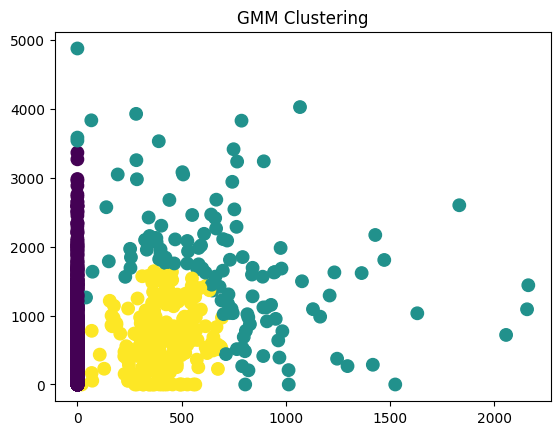

In [258]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis');
plt.title("GMM Clustering")

## Linear Regression

### Feature Selection

In [259]:
X1 = df[['PctUnemployed']].astype(int).values
y1 = df['ViolentCrimesPerPop'].astype(int).values

### Splitting the data

In [260]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Fitting the model

In [261]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression()

### Predicting the values

In [262]:
y_pred = regr.predict(X1_test)

### Visualisation of plots

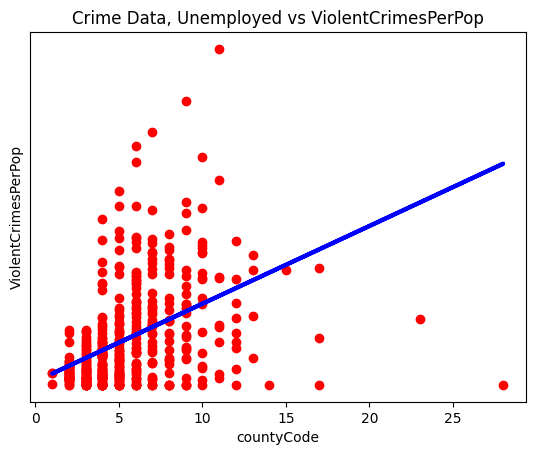

In [263]:
plt.scatter(X1_test, y1_test,  color='red')
plt.plot(X1_test, y_pred, color='blue', linewidth=3)

plt.title('Crime Data, Unemployed vs ViolentCrimesPerPop')
plt.xlabel('countyCode')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())
plt.show()

## Logistic Regression

In [264]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


### Data Slicing

In [265]:
df1 = df.iloc[:200]

### Histogram Visualization of Selected Features

In [266]:
age12t21 = df1['agePct12t21'].astype(int)

In [267]:
age12t21.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

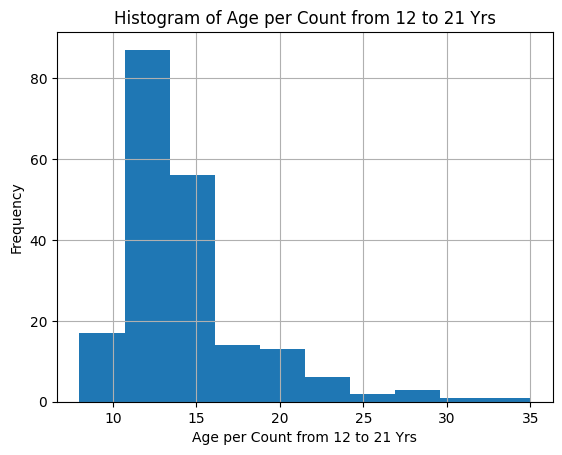

In [268]:
%matplotlib inline
age12t21.hist()
plt.title('Histogram of Age per Count from 12 to 21 Yrs')
plt.xlabel('Age per Count from 12 to 21 Yrs')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

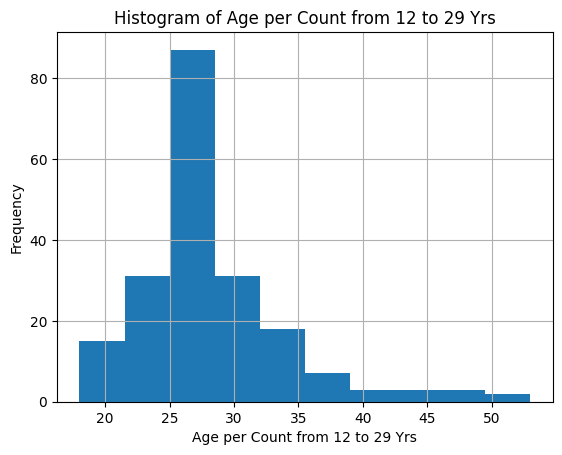

In [269]:
age12t29 = df1['agePct12t29'].astype(int)
%matplotlib inline
age12t29.hist()
plt.title('Histogram of Age per Count from 12 to 29 Yrs')
plt.xlabel('Age per Count from 12 to 29 Yrs')
plt.ylabel('Frequency')
plt.show

### Visualizing Feature Distribution to Analyze Labels and Their Frequency

<function matplotlib.pyplot.show(close=None, block=None)>

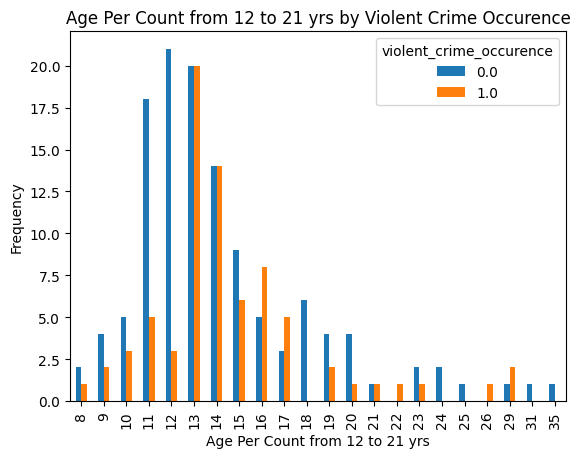

In [270]:
pd.crosstab(age12t21, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 21 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 21 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

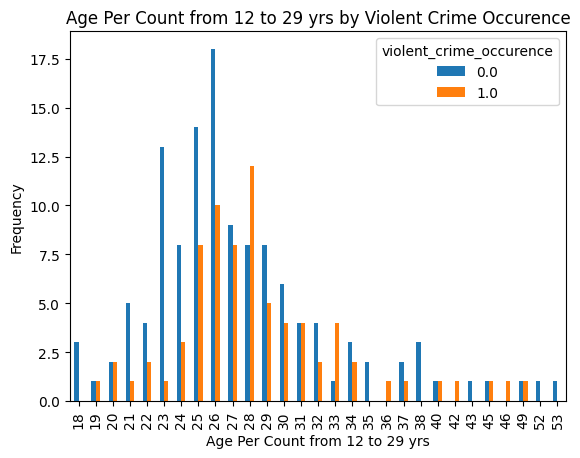

In [271]:
pd.crosstab(age12t29, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 29 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 29 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

In [272]:
X_LogReg= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up', 'PctUnemployed', 'murdPerPop', 'MalePctDivorce']

In [273]:
y_LogReg = df1[['violent_crime_occurence']]

### Training the Model

In [274]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(df1[X_LogReg], y_LogReg, test_size=0.2, random_state=0)

In [275]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Metrics

In [276]:
y_pred_LogReg = logreg.predict(X_test_LogReg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.80


### Creating the Confusion Matrix to make further conclusion 

Model Accuracy for Logistic Regression: 0.8


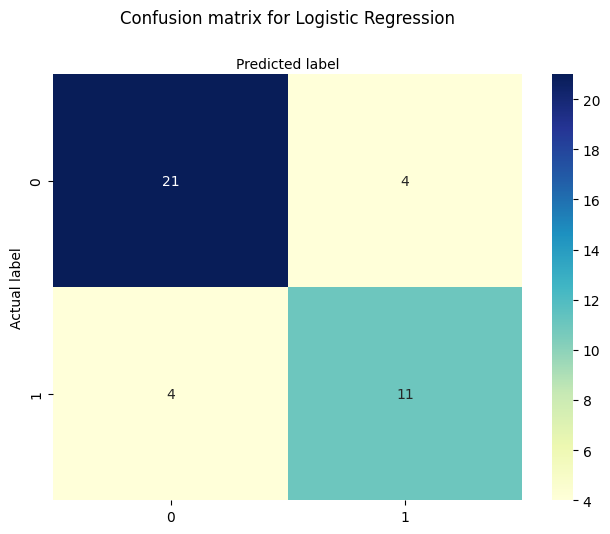

In [277]:
cnf_matrix_LogitRegression = metrics.confusion_matrix(y_test_LogReg, y_pred_LogReg)
cnf_matrix_LogitRegression

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogitRegression), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test_LogReg, y_pred_LogReg))


## Decision Tree

## Crime Prediction Using Decision Tree Classifier

A Decision Tree Classifier from sklearn was utilized to predict whether a crime has occurred based on selected features. The model was trained and tested, and its accuracy was evaluated to assess its performance.

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [279]:
df_original = df.copy()
df = df[['population','householdsize','medIncome','PctUnemployed',
         'PolicReqPerOffic','murders','rapes','burglaries','robberies',
         'violent_crime_occurence']]

X_DecisionTree = df.drop('violent_crime_occurence', axis=1)
Y_DecisionTree = df['violent_crime_occurence']

df = df_original.copy()

In [280]:
from sklearn.model_selection import train_test_split
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

### Implementing Decision Tree Classifier

In [281]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=20, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [282]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [283]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array([0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

### Metrics

In [284]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

85.5595667870036

### Plotting the tree

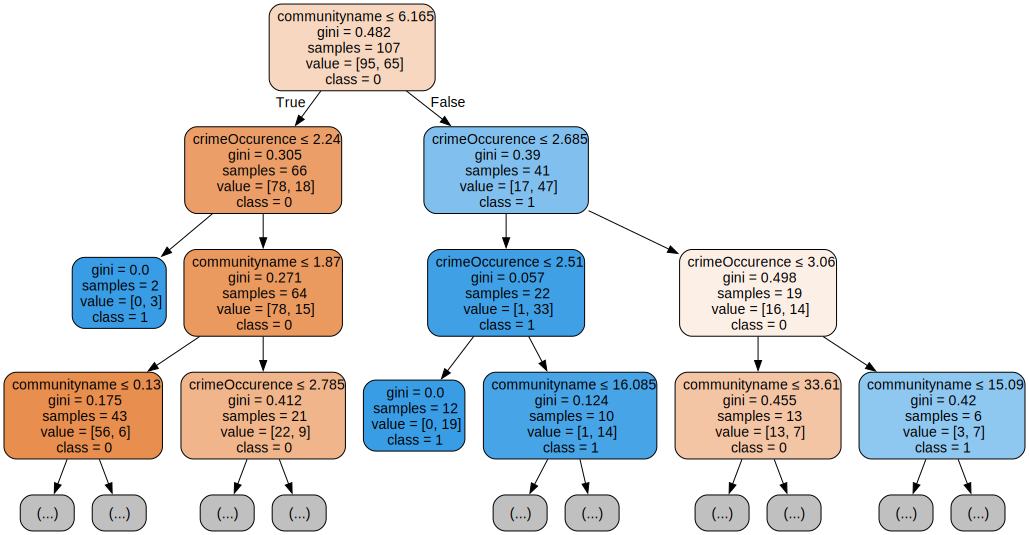

In [285]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Make sure X_train and y_train are defined

# Select a single tree from the Random Forest
single_tree = rf_classifier.estimators_[0]  

dot_data = tree.export_graphviz(
    single_tree, 
    out_file=None, 
    feature_names=df.columns[:single_tree.n_features_in_],  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True, 
    special_characters=True,
    max_depth=3
)

# Render tree
graph = graphviz.Source(dot_data, format="png")
graph


### Confusion Matrix

Model Accuracy for Random Forest: 0.855595667870036


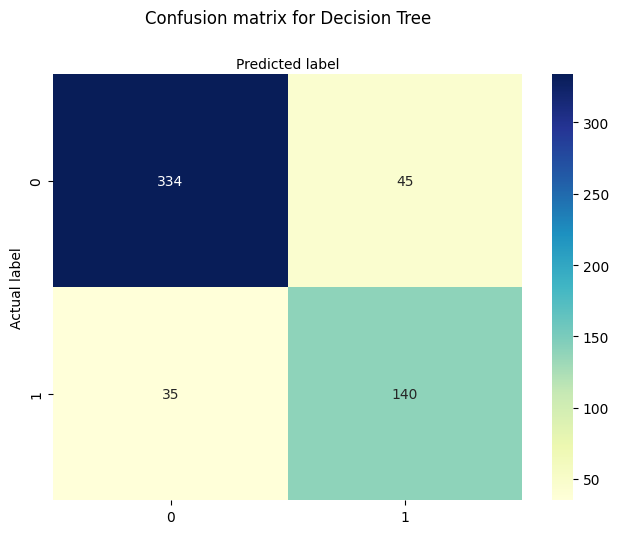

In [286]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))

## Gaussian Naive Bayes Classifier

### Label Creation

In [287]:
murder = list(map(float, df['murdPerPop']))
murders_mean = sum(murder)/len(murder)
murders_mean
# print(df.columns.tolist())  # See exact column names


5.859295711060948

In [288]:
df['mean_murder'] = murders_mean
df['murder_occurence'] = np.where(murder>=df['mean_murder'], 'yes', 'no')
df.groupby('murder_occurence').mean(numeric_only=True)

,crimeOccurence,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,ViolentCrimesPerPop,mean_violent_crimes,violent_crime_occurence,mean_murder
murder_occurence,,,,,,,,,,,,,,,,,,,,,
no,0.843879,5.511692,29966.262724,2.708425,4.346499,90.388755,2.568191,5.626314,14.318920,27.257166,...,20.060523,2497.271045,2.755475,0.460784,0.545392,1.055365,307.528776,530.304005,0.175378,5.859296
yes,0.835742,5.461235,97352.679369,2.705230,18.866544,71.734625,2.865112,12.390250,14.688331,28.385545,...,41.481209,3331.356767,3.586899,1.972510,21.558476,15.037898,955.948134,530.304005,0.666229,5.859296


### Data Slicing

In [289]:
df1 = df.iloc[:700]

### Applying Gaussian NB classifier

In [290]:
X_NaiveBayes= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up','PctUnemployed']
Y_NaiveBayes = df1[['murder_occurence']]

In [291]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

In [292]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [293]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Model Accuracy 

In [294]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.79


### Correlation matrix for showing the features 

In [295]:
df1[X_NaiveBayes].corr()

,agePct12t21,agePct12t29,agePct16t24,agePct65up,PctUnemployed
agePct12t21,1.000000,0.857899,0.923780,-0.362218,0.219374
agePct12t29,0.857899,1.000000,0.946554,-0.484518,0.159712
agePct16t24,0.923780,0.946554,1.000000,-0.288004,0.141656
agePct65up,-0.362218,-0.484518,-0.288004,1.000000,0.131281
PctUnemployed,0.219374,0.159712,0.141656,0.131281,1.000000


### Correlation Heatmap for better visualization 

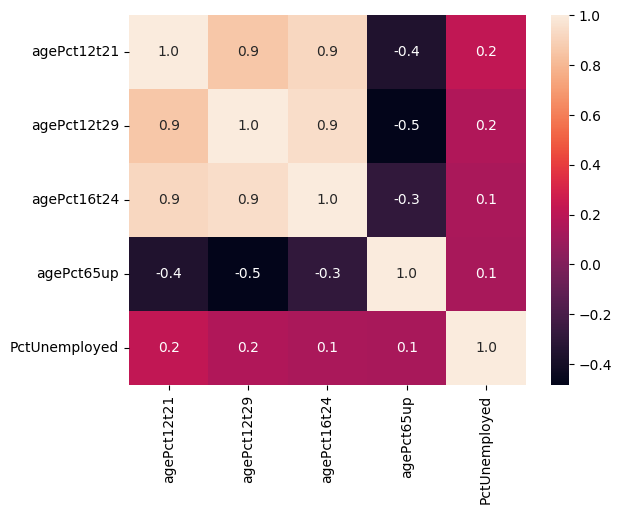

In [296]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Random Forest: 0.7928571428571428


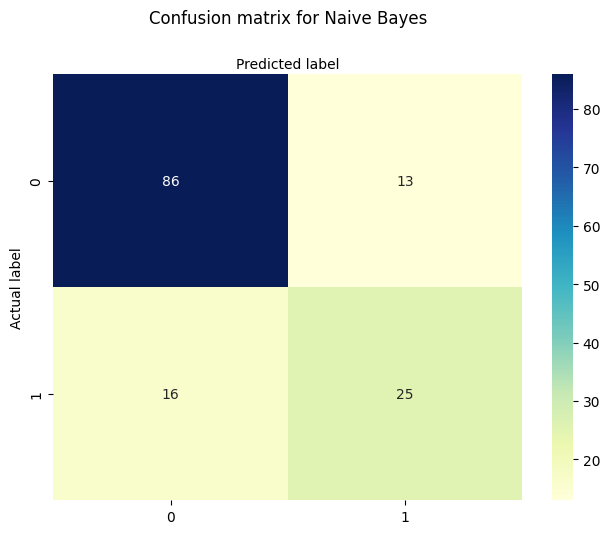

In [297]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

## Random Forest Classifier

### Label Creation

In [298]:
df['mean_violent_crimes'] = violent_crimes_mean
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], '1', '0')
df.groupby('violent_crime_occurence').mean(numeric_only=True)

,crimeOccurence,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PolicReqPerOffic,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,ViolentCrimesPerPop,mean_violent_crimes,mean_murder
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0,0.847213,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,...,34.428080,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,193.607956,530.304005,5.859296
1,0.829396,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,...,170.066667,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,1172.324160,530.304005,5.859296


### Feature Selection

In [299]:
df_original = df.copy()

df = df[['population', 'householdsize', 'medIncome', 'PctUnemployed', 
         'PolicReqPerOffic', 'murders', 'rapes', 'burglaries', 'robberies', 
         'violent_crime_occurence']]

X = df.drop(columns=['violent_crime_occurence'])
y = df['violent_crime_occurence']

df = df_original


In [300]:
X_train_RandomForest, X_test_RandomForest, Y_train_RandomForest, Y_test_RandomForest = train_test_split(X, y, random_state=1)

### Calculating gini index for Random Forest Classifier

In [301]:
from sklearn.ensemble import RandomForestClassifier
clf_gini = RandomForestClassifier(criterion = "gini",random_state = 200,max_depth=30, min_samples_split=9, min_samples_leaf=6)
clf_gini

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

### Fitting and predicitng the model

In [302]:
clf_gini.fit(X_train_RandomForest, Y_train_RandomForest)

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

In [303]:
Y_Pred_RandomForest = clf_gini.predict(X_test_RandomForest)

### Metrics

In [304]:
ac=accuracy_score(Y_test_RandomForest,Y_Pred_RandomForest)*100
ac

86.46209386281588

### Confusion Matrix

In [305]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_RandomForest, Y_Pred_RandomForest)
cnf_matrix_RandomForest

array([[347,  32],
       [ 43, 132]])

Model Accuracy for Random Forest: 0.8646209386281588


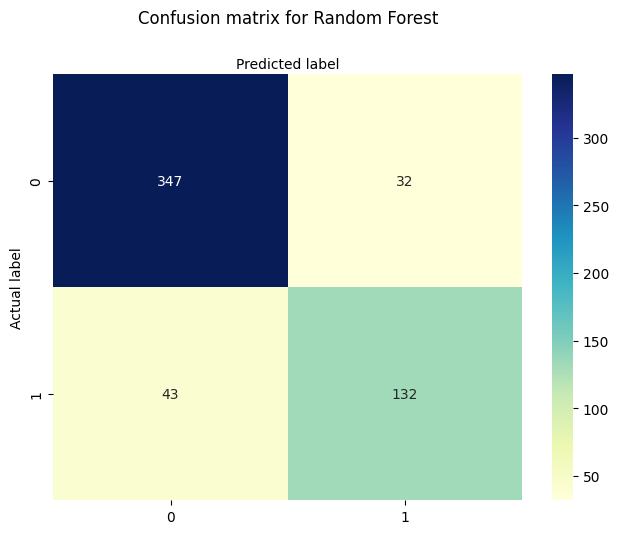

In [306]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_RandomForest, Y_Pred_RandomForest))

## SVM

In [307]:
df2 = df.copy()  # Ensure df2 exists
df2 = df2[['population', 'householdsize', 'racePctWhite', 'racepctblack', 
           'racePctHisp', 'medIncome', 'PctUnemployed', 'PolicReqPerOffic', 
           'murders', 'rapes', 'burglaries', 'robberies', 'violent_crime_occurence']]

In [308]:
X_SVM = df2.iloc[:, [3, 4]].values
Y_SVM = df2.iloc[:, 12].values

### Splitting the dataset into the Training set and Test set

In [309]:
from sklearn.model_selection import train_test_split
X_train_SVM, X_test_SVM, Y_train_SVM, Y_test_SVM = train_test_split(X_SVM, Y_SVM, test_size = 0.30, random_state = 0)

### Feature Scaling

In [310]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(X_train_SVM)
X_test_SVM = sc.transform(X_test_SVM)
print(X_train_SVM)

[[ 0.557996   -0.49362092]
 [-0.58847309 -0.28112885]
 [-0.62648141  3.73638802]
 ...
 [-0.27887807  1.55338608]
 [-0.55737538 -0.35266784]
 [ 0.01551364  0.09498213]]


### Training & fitting the model

In [311]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(kernel='linear', random_state=0)

In [312]:
Y_Pred_SVM = classifier.predict(X_test_SVM)

The support vectors for the model are as follows


In [313]:
print(classifier.support_vectors_)

[[ 0.5282804  -0.43128991]
 [-0.24847141  0.92865938]
 [-0.21530052 -0.43483145]
 ...
 [ 0.69275276 -0.09059428]
 [-0.27887807  1.55338608]
 [ 0.01551364  0.09498213]]


### Confusion Matrix

Model Accuracy for SVM: 0.8090225563909774


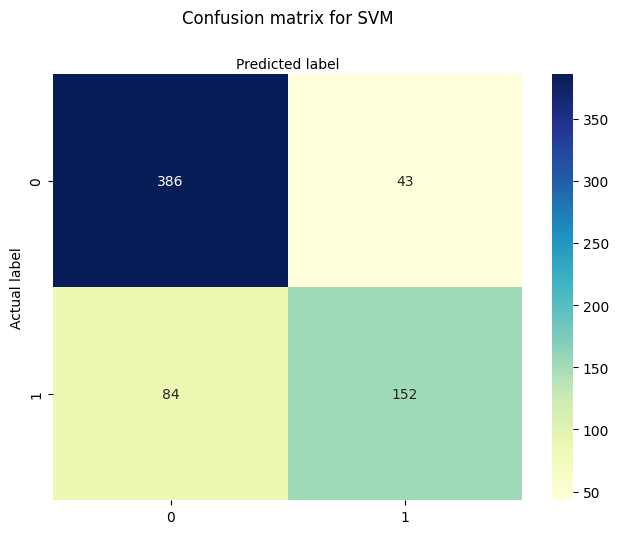

In [314]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVM)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVM))


### Accuracy

In [315]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVM)*100
ac

80.90225563909775

### Visualising model results

C:\Users\aryan\AppData\Local\Temp\ipykernel_24464\3274147918.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


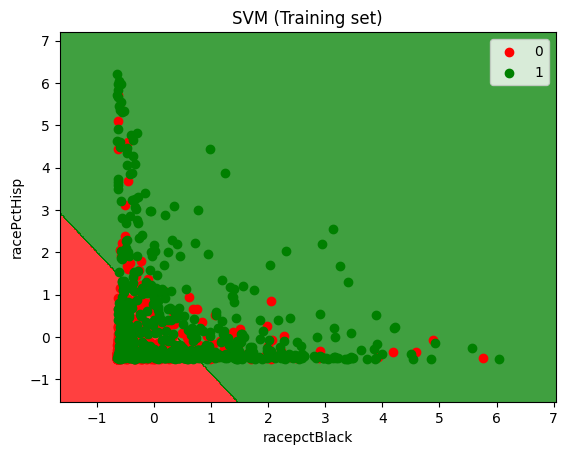

In [316]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_SVM[:, [0, 1]], Y_train_SVM  

# Create mesh grid
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

grid_points = np.array([X1.ravel(), X2.ravel()]).T  
Z = classifier.predict(grid_points)

if isinstance(Z[0], str):  
    Z = np.array([int(label) for label in Z])  

Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Training set)')
plt.xlabel('racepctBlack')  
plt.ylabel('racePctHisp')  
plt.legend()
plt.show()


C:\Users\aryan\AppData\Local\Temp\ipykernel_24464\31768177.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


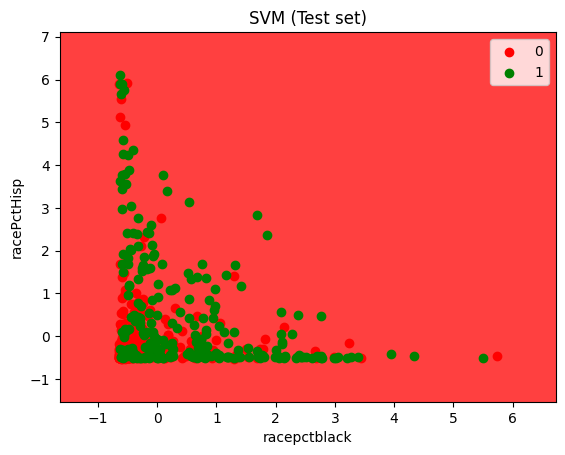

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_test_SVM, Y_test_SVM

X_set = X_set[:, [0, 1]]

# Create mesh grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on mesh grid points
grid_points = np.array([X1.ravel(), X2.ravel()]).T
grid_points = np.nan_to_num(grid_points) 

Z = classifier.predict(grid_points)

if not np.issubdtype(Z.dtype, np.number):
    Z = np.where(Z == 'yes', 1, 0) 

Z = Z.reshape(X1.shape)

if np.isnan(Z).any():
    print("Warning: Z contains NaNs. Check classifier output!")

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

y_set = np.array(y_set)

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Test set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()


### Fitting SVM to the Training set

In [318]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(random_state=0)

In [319]:
Y_Pred_SVMrbf = classifier.predict(X_test_SVM)

Model Accuracy for Random Forest: 0.7984962406015037


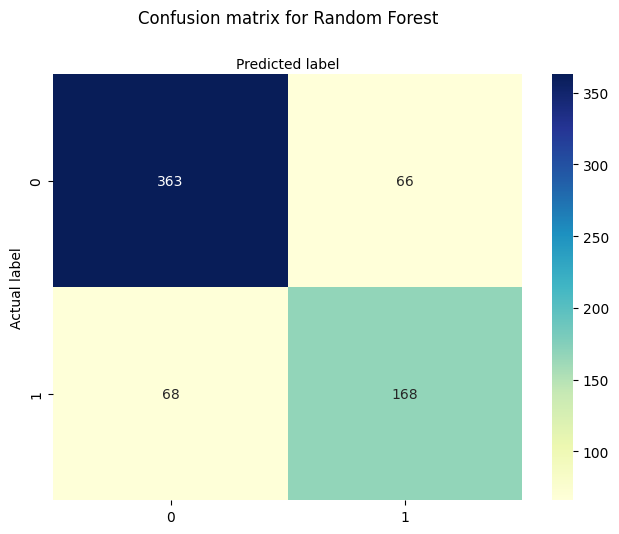

In [320]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVMrbf)
cnf_matrix_RandomForest

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVMrbf))


In [321]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVMrbf)*100
ac

79.84962406015038

## PCA

### Applying PCA for Dimensionality Reduction

Principal Component Analysis (PCA) is an effective method for accelerating machine learning algorithms by reducing the dimensionality of input features while preserving essential variance. When dealing with high-dimensional data, training can become slow, making PCA a useful approach to retain meaningful information while minimizing loss, as indicated by the variance ratio.

In our crime dataset, PCA was applied to age-related columns to reduce their dimensionality to a 2D space. The transformed features were then plotted against the 'violent_crime_occurrence' label to analyze the impact of PCA. To ensure accurate results, the feature set was first standardized and scaled. The selected columns used for PCA include: agePct12t21, agePct12t29, agePct16t24, agePct65up

In [322]:
from sklearn.model_selection import cross_val_score

### Individual feature vs label plots to vizualize data before applying PCA

<function matplotlib.pyplot.show(close=None, block=None)>

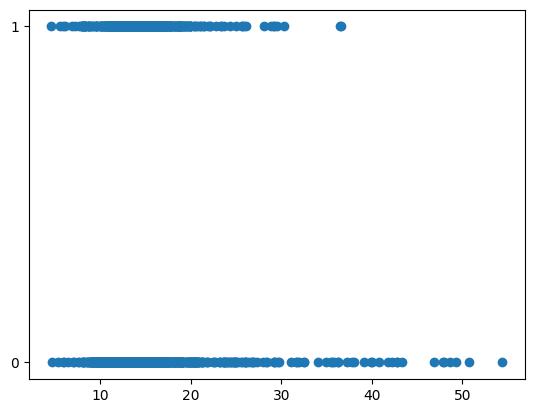

In [323]:
X3 = df['agePct12t21'].values
y3 = df['violent_crime_occurence'].values
plt.scatter(X3, y3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

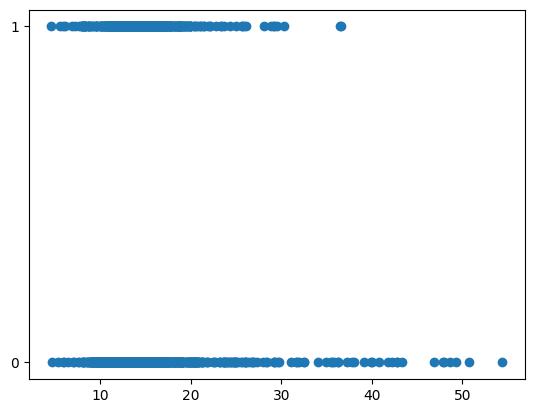

In [324]:
X4 = df['agePct12t21'].values
y4 = df['violent_crime_occurence'].values
plt.scatter(X4, y4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

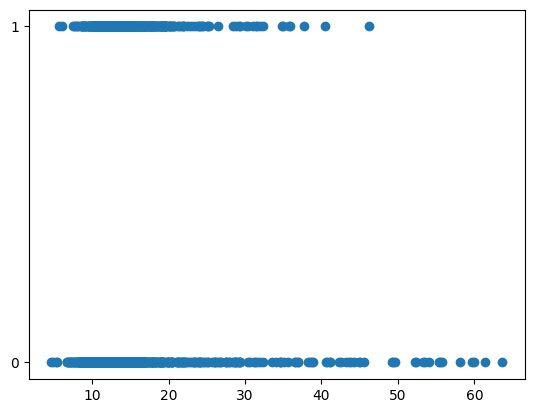

In [325]:
X5 = df['agePct16t24'].values
y5 = df['violent_crime_occurence'].values
plt.scatter(X5, y5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

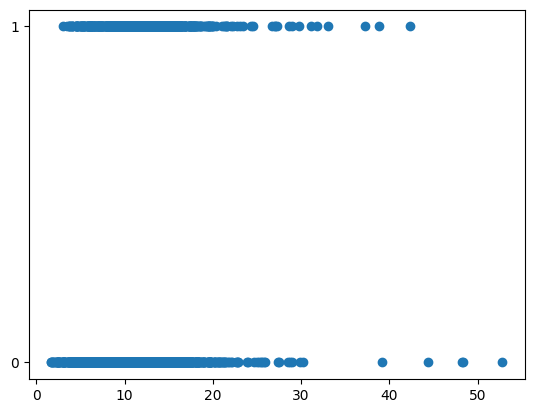

In [326]:
X6 = df['agePct65up'].values
y6 = df['violent_crime_occurence'].values
plt.scatter(X6, y6)
plt.show

### Insights from Visualization

The analysis suggests that all age range features exhibit a similar relationship with the label. As a result, these features can be combined to reduce dimensionality, thereby improving the efficiency and speed of the model's learning process.

### Feature Selection

In [327]:
features = ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up']
X= df.loc[:, features].values
y = df.loc[:, ['violent_crime_occurence']].values

### Splitting Dataset into Test and Training Data


In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling and Standardizing Data

In [329]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA from sklearn for 2 Principal Components

In [330]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
explained_variance = pca.explained_variance_ratio_

### Final Dataframe with label concatenated with features

In [331]:
finalDf = pd.concat([principalDf, df[['violent_crime_occurence']]], axis = 1)

### Plot to observe the 2 Principal Components as a result of PCA 

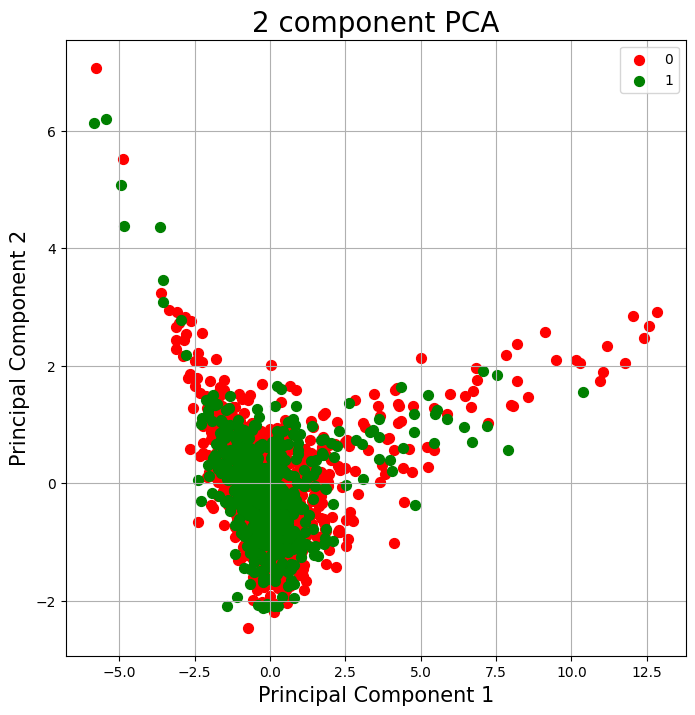

In [332]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['violent_crime_occurence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance Ratio

The variance ratio values are 75.94% and 20.71%, indicating that approximately 96% of the information can be retained and reconstructed from the model. This confirms that the Principal Components align well with standard model conventions.

In [333]:
print(explained_variance)

[0.75942017 0.20717271]


## **KNN**

In [334]:
from sklearn.model_selection import train_test_split

X_KNN = df.iloc[:, [2, 6]].copy() 
Y_KNN = df.iloc[:, 12].copy()

# Handle Categorical Features (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_columns = X_KNN.select_dtypes(include=['object']).columns.tolist()

if categorical_columns:
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(X_KNN[categorical_columns])
    X_numeric = X_KNN.drop(columns=categorical_columns).values
    X_KNN = np.hstack((X_numeric, X_encoded)) 
else:
    X_KNN = X_KNN.values  

if Y_KNN.dtype in ['float64', 'int64']:  
    Y_KNN = pd.qcut(Y_KNN, q=2, labels=[0, 1])  


### Splitting the dataset into the Training set and Test set

In [335]:

X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(
    X_KNN, Y_KNN, test_size=0.30, random_state=0, stratify=Y_KNN
)

### Feature Scaling

In [336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_KNN = scaler.fit_transform(X_train_KNN)
X_test_KNN = scaler.transform(X_test_KNN)


### PCA for Dimensionality Reduction

In [337]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train_KNN)
X_test_PCA = pca.transform(X_test_KNN)


### Training and testing the model

In [338]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}  # Testing k from 1 to 20

grid_search = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), param_grid, cv=5)
grid_search.fit(X_train_PCA, Y_train_KNN)

best_k = grid_search.best_params_['n_neighbors'] 

classifier_pca = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=2)
classifier_pca.fit(X_train_PCA, Y_train_KNN)

# Predictions
Y_Pred_KNN = classifier_pca.predict(X_test_PCA)


### Accuracy, Confusion Matrix & Heatmap

Optimized KNN Accuracy: 60.00%


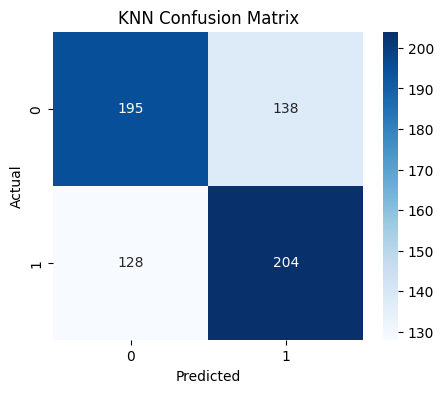

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       333
           1       0.60      0.61      0.61       332

    accuracy                           0.60       665
   macro avg       0.60      0.60      0.60       665
weighted avg       0.60      0.60      0.60       665



In [339]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(Y_test_KNN, Y_Pred_KNN) * 100
print(f"Optimized KNN Accuracy: {accuracy:.2f}%")

# Confusion Matrix
cm = confusion_matrix(Y_test_KNN, Y_Pred_KNN)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('KNN Confusion Matrix')
plt.show()

print(classification_report(Y_test_KNN, Y_Pred_KNN))


### PCA Decision Boundary Visualization

C:\Users\aryan\AppData\Local\Temp\ipykernel_24464\4222349.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test_PCA[Y_test_KNN == label, 0], X_test_PCA[Y_test_KNN == label, 1],


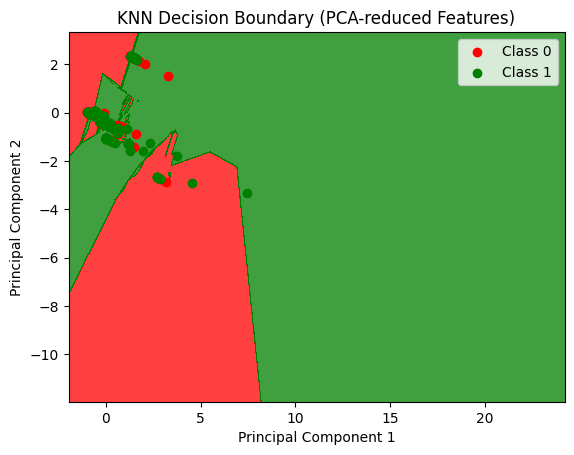

In [340]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA to both train & test sets
pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train_KNN)
X_test_PCA = pca.transform(X_test_KNN)

classifier_pca = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=2)
classifier_pca.fit(X_train_PCA, Y_train_KNN)

# ✅ Meshgrid for decision boundary visualization
X1, X2 = np.meshgrid(
    np.arange(start=X_train_PCA[:, 0].min() - 1, stop=X_train_PCA[:, 0].max() + 1, step=0.01),
    np.arange(start=X_train_PCA[:, 1].min() - 1, stop=X_train_PCA[:, 1].max() + 1, step=0.01)
)

cmap = ListedColormap(('red', 'green'))

plt.contourf(
    X1, X2, 
    classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=cmap
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, label in enumerate(np.unique(Y_test_KNN)):
    plt.scatter(X_test_PCA[Y_test_KNN == label, 0], X_test_PCA[Y_test_KNN == label, 1], 
                c=cmap(i), label=f'Class {label}')

plt.title('KNN Decision Boundary (PCA-reduced Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Random Forest Classification & Confusion Matrix

Random Forest Accuracy: 57.14%


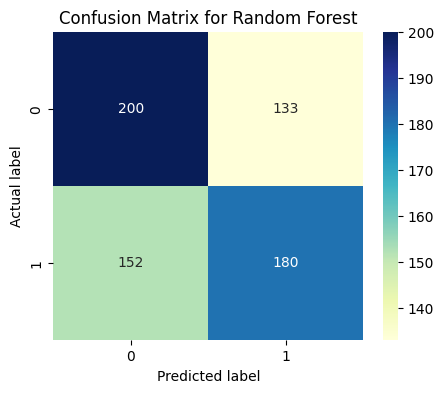

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_KNN, Y_train_KNN)

# Predict using Random Forest
Y_Pred_RF = rf_classifier.predict(X_test_KNN)

# Compute Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(Y_test_KNN, Y_Pred_RF)

# Heatmap of Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title('Confusion Matrix for Random Forest')

accuracy_RF = metrics.accuracy_score(Y_test_KNN, Y_Pred_RF)
print(f"Random Forest Accuracy: {accuracy_RF:.2%}")


# **Conclusion**

Various classification algorithms can be used to assess the probability of a crime occurring. These models help determine whether a crime will take place, categorize it as violent or non-violent, or identify whether it involves murder. Such predictions could greatly support local law enforcement agencies and the FBI in solving cases with improved accuracy and efficiency.

Among the classification models evaluated, the Random Forest Classifier demonstrated the strongest performance. By utilizing majority voting and constructing decision trees for each feature, it achieved the highest recorded accuracy of 57.14%. Furthermore, our analysis indicated that the dataset is better suited for non-linear models, as linear approaches such as Linear Regression yielded less favorable results.